In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 4 - Principal and Minor Eigenvectors of a Matrix Sequence
# RQ - Comparison of Adaptive GEVD  Deflated, Weighted
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [3]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 10
nEA      = 4
nEpochs  = 3


In [4]:
# Generate the covX random matrices
covX = 3*np.array([ \
    [ 0.4270,  0.0110, -0.0050, -0.0250,  0.0890, -0.0790, -0.0190,  0.0740,  0.0890,  0.0050 ], \
    [ 0.0110,  5.6900, -0.0690, -0.2820, -0.7310,  0.0900, -0.1240,  0.1000,  0.4320, -0.1030 ], \
    [-0.0050, -0.0690,  0.0800,  0.0980,  0.0450, -0.0410,  0.0230,  0.0220, -0.0350,  0.0120 ], \
    [-0.0250, -0.2820,  0.0980,  2.8000, -0.1070,  0.1500, -0.1930,  0.0950, -0.2260,  0.0460 ], \
    [ 0.0890, -0.7310,  0.0450, -0.1070,  3.4400,  0.2530,  0.2510,  0.3160,  0.0390, -0.0100 ], \
    [-0.0790,  0.0900, -0.0410,  0.1500,  0.2530,  2.2700, -0.1800,  0.2950, -0.0390, -0.1130 ], \
    [-0.0190, -0.1240,  0.0230, -0.1930,  0.2510, -0.1800,  0.3270,  0.0270,  0.0260, -0.0160 ], \
    [ 0.0740,  0.1000,  0.0220,  0.0950,  0.3160,  0.2950,  0.0270,  0.7270, -0.0960, -0.0170 ], \
    [ 0.0890,  0.4320, -0.0350, -0.2260,  0.0390, -0.0390,  0.0260, -0.0960,  0.7150, -0.0090 ], \
    [ 0.0050, -0.1030,  0.0120,  0.0460, -0.0100, -0.1130, -0.0160, -0.0170, -0.0090,  0.0650 ]])
covY = 2*np.array([ \
    [ 0.3350,  0.0260, -0.0510, -0.0120,  0.0790,  0.0170,  0.0290,  0.0080,  0.0770, -0.0300], \
    [ 0.0260,  0.0910,  0.0110, -0.0100,  0.0060, -0.0140, -0.0020, -0.0230,  0.0110,  0.0350], \
    [-0.0510,  0.0110,  0.0780,  0.0000,  0.0160,  0.0030,  0.0300, -0.0350, -0.0030, -0.0490], \
    [-0.0120, -0.0100,  0.0000,  0.0820, -0.0030, -0.0260, -0.0250, -0.0290, -0.0150,  0.0250], \
    [ 0.0790,  0.0060,  0.0160, -0.0030,  0.7970,  0.1940, -0.0370, -0.0230,  0.0590, -0.1450], \
    [ 0.0170, -0.0140,  0.0030, -0.0260,  0.1940,  1.5000,  0.0140, -0.1040,  0.1140, -0.2290], \
    [ 0.0290, -0.0020,  0.0300, -0.0250, -0.0370,  0.0140,  0.2770, -0.0300, -0.0770, -0.0510], \
    [ 0.0080, -0.0230, -0.0350, -0.0290, -0.0230, -0.1040, -0.0300,  0.3170,  0.0220,  0.0100], \
    [ 0.0770,  0.0110, -0.0030, -0.0150,  0.0590,  0.1140, -0.0770,  0.0220,  0.5380,  0.0340], \
    [-0.0300,  0.0350, -0.0490,  0.0250, -0.1450, -0.2290, -0.0510,  0.0100,  0.0340,  0.6680]])


In [5]:
# Generate X samples
from scipy.linalg import eigh

eigvals, eigvecs = eigh(covX)
print("eigvals covX=\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R


eigvals covX=
 [17.90133833 10.22120991  8.60784587  6.53607089  2.23956443  1.83686292
  1.1360816   0.76926447  0.22448354  0.15027803]


In [6]:
# Generate Y samples
from scipy.linalg import eigh

eigvals, eigvecs = eigh(covY)
print("eigvals covY=\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
Y = V @ D @ R


eigvals covY=
 [3.2862903  1.5906385  1.31006483 0.98895742 0.68211196 0.63060327
 0.45923851 0.19287013 0.13395913 0.09126596]


In [7]:
# Compute Corrl matrix and eigen values for X samples
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvalsX, eigvecsX = eigh(corX)
print("eigvals corX=\n", eigvalsX[::-1])


eigvals corX=
 [17.35952538 10.87794952  8.12614182  6.54986492  2.33556016  1.81555314
  1.07684375  0.7640897   0.24113264  0.13398863]


In [8]:
# Compute Corrl matrix and eigen values for Y samples
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corY = (Y @ Y.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvalsY, eigvecsY = eigh(corY)
print("eigvals corY=\n", eigvalsY[::-1])

eigvals corY=
 [3.18289592 1.6952706  1.24035081 0.9937261  0.71325541 0.62406161
 0.43156859 0.19224582 0.1433277  0.08131676]


In [9]:
# Compute true Generalized Eigenvectors
from scipy.linalg import eigh
from sklearn.preprocessing import normalize
eigvalsXY, eigvecsXY = eigh(corX, corY)
EstV = np.fliplr(eigvecsXY)
EstV = normalize(EstV, axis=0, norm='l2')


In [12]:
# Adaptive algorithm
from numpy import linalg as la
from numpy.linalg import inv

A  = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
B  = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
W1 = 0.1 * np.ones(shape=(nDim,nEA)) # weight vectors of all algorithms
W2 = W1
W3 = W1
c = [2.6-0.3*k for k in range(nEA)]
C = np.diag(c)

cos_t2 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error
cos_t3 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter

        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)
        y = Y[:,iter]
        y = y.reshape(nDim,1)
        B = B + (1.0/(1 + cnt))*((np.dot(y, y.T)) - B)

        # Deflated Gradient Descent
        W2 = W2 + (1/(20 + cnt))*(A @ W2 - B @ W2 @ np.triu(W2.T @ A @ W2)) @ inv(np.diag(np.diagonal(W2.T @ B @ W2)))

        # Weighted Gradient Descent
        W3 = W3 + (1/(300 + cnt))*(A @ W3 @ C - B @ W3 @ C @ (W3.T @ A @ W3)) @ inv(np.diag(np.diagonal(W3.T @ B @ W3)))
 
        for i in range(nEA):
            #u1 = W1[:,i]/la.norm(W1[:,i])
            #u1 = u1.reshape(nDim,1)
            u2 = W2[:,i]/la.norm(W2[:,i])
            u2 = u2.reshape(nDim,1)
            u3 = W3[:,i]/la.norm(W3[:,i])
            u3 = u3.reshape(nDim,1)
            vi = EstV[:,i].reshape(nDim,1)
            #cos_t1[i,cnt] = abs(u1.T @ vi)
            cos_t2[i,cnt] = abs(u2.T @ vi)
            cos_t3[i,cnt] = abs(u3.T @ vi)


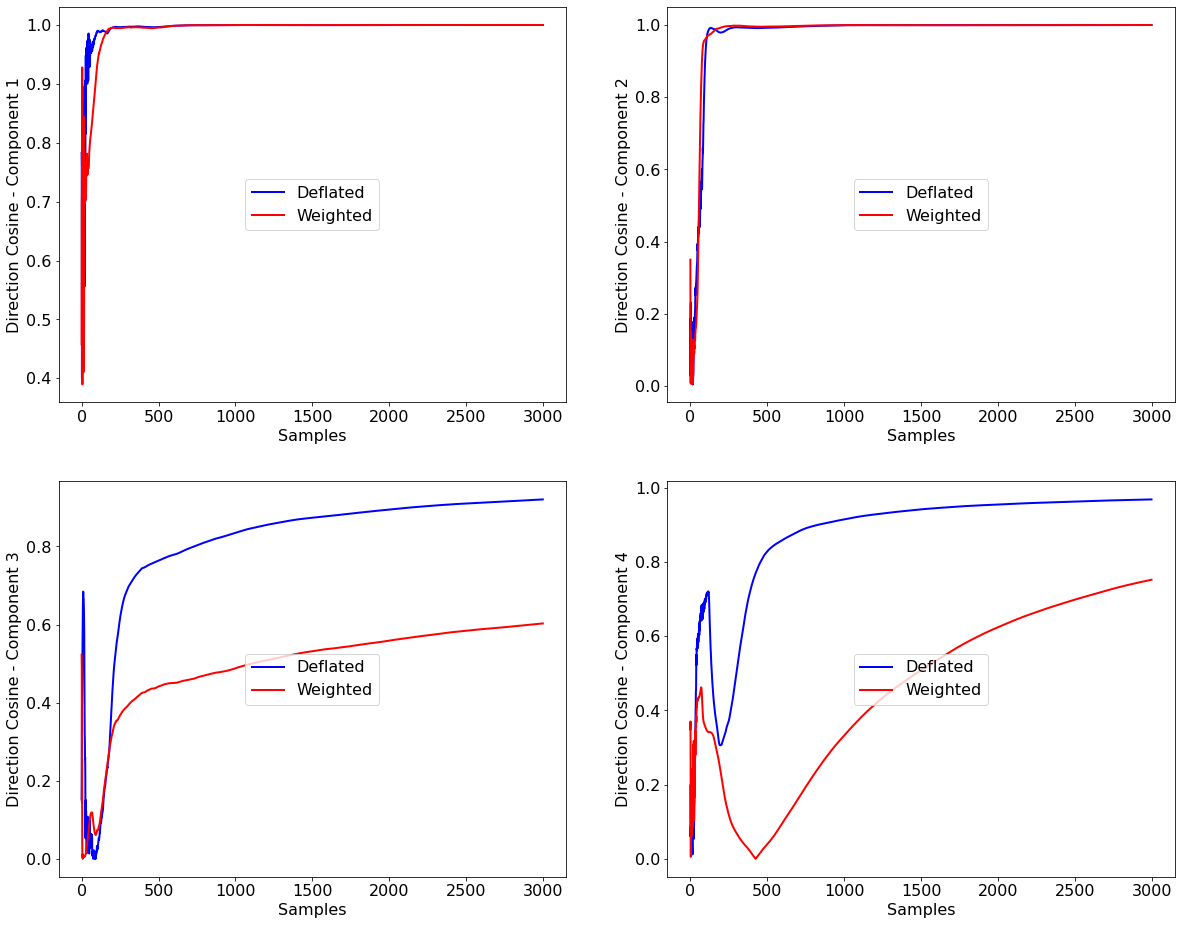

In [13]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(cos_t2[0,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[0,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 1')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 2)
plt.plot(cos_t2[1,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[1,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 2')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 3)
plt.plot(cos_t2[2,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[2,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 3')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 4)
plt.plot(cos_t2[3,:], lw=2, color='b', label='Deflated')
plt.plot(cos_t3[3,:], lw=2, color='r', label='Weighted')
plt.ylabel('Direction Cosine - Component 4')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()